# SIR model analysis

### Done in 3 phases for 100 countries (but visualised only for Germany)
1. Initial Phase: Based on hyperparameters: beta, gamma, initial infected polulation (I0) and max suspectibe population (S0), we make a simple SIR model to estimate the behaviour for 100 days.

2. 2nd Phase: Optimize beta and gamma with curve fitting

3. 3rd Phase: Dynamic beta In SIR(Infection rate)
    

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

# Data Prepartion Phase

In [2]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439


In [4]:
time_idx=pd_raw.columns[4:]

In [5]:
df_analyse = pd.DataFrame({
     'date':time_idx})
df_analyse.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
country_list=pd_raw['Country/Region']

In [7]:
for each in country_list:
     df_analyse[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [8]:
df_analyse=df_analyse.iloc[:,:101]
df_analyse.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Kenya,"Korea, South",Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,4,...,0,3,0,0,0,0,0,0,0,0


In [9]:
countries = [each for each in df_analyse.columns]
countries=countries[1:]
print(countries)
print(len(countries))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indones

# Simple SIR model

In [10]:

N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate

# df_analyse[countries[2]]

'''Its a differential equations of the dS, dI and dR.'''
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 

        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)

    '''

    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

def do_plot(propagation_rates,country):
    fig, ax1 = plt.subplots(1, 1)
    ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
    ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
    ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')
    ax1.set_ylim(10, 1000000)
    ax1.set_yscale('linear')
    ax1.set_title('Szenario SIR simulations for country: {}'.format(country),size=16)
    ax1.set_xlabel('time in days',size=16)
    ax1.legend(loc='best',
               prop={'size': 16});

def run_initialSIR(country,df):
    
    # condition I0+S0+R0=N0
    I0=df[country][35]
    S0=N0-I0
    R0=0
    
    SIR=np.array([S0,I0,R0])
    propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})

    for each_t in np.arange(100):

        new_delta_vec=SIR_model(SIR,beta,gamma)

        SIR=SIR+new_delta_vec

        propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                    'infected':SIR[1],
                                                    'recovered':SIR[2]}, ignore_index=True)
#     print(len(propagation_rates))
    return propagation_rates
#     print(propagation_rates)


# for country in countries:
#     propagation_rates=run_initialSIR(country,df_analyse)
#     do_plot(propagation_rates)

### Visualise simple SIR model
#### Visualisation only for one Country -- Germany
Note: Make changes in the loop below of change the name of the country to visualise them

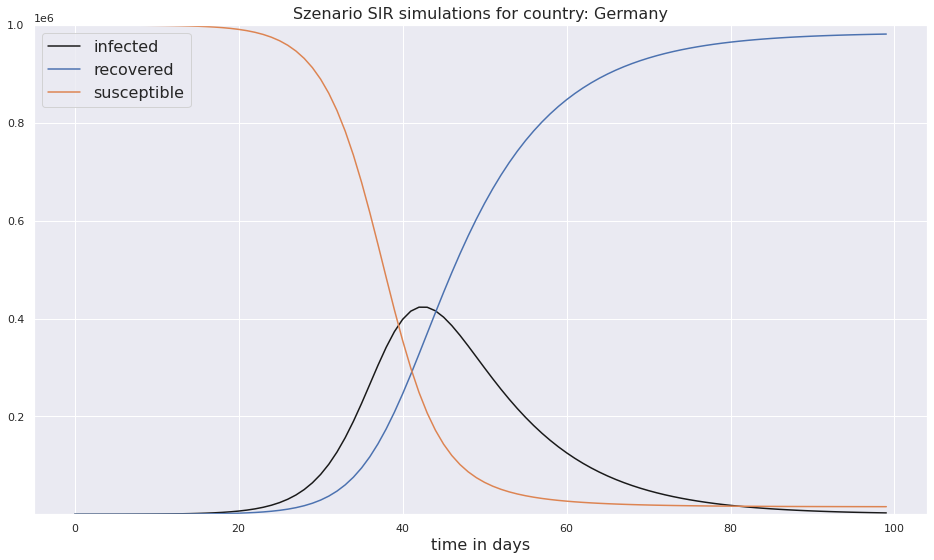

In [11]:
# for country in countries:
#     propagation_rates=run_initialSIR(country,df_analyse)
#     do_plot(propagation_rates)
country='Germany'
propagation_rates=run_initialSIR(country,df_analyse)
do_plot(propagation_rates,country)

# Optimize beta and gamma with curve fitting

In [12]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt


def SIR_model_fit(country,df):
    
    N0=1000000 #max susceptible population
    beta=0.4   # infection spread dynamics
    gamma=0.1  # recovery rate
    
    def fit_odeint(x, beta, gamma):
        '''
        helper function for the integration
        '''
        return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] 
        # we only would like to get dI

    ydata = np.array(df[country][35:])
    t=np.arange(len(ydata))
    # ydata[0]
    # ydata[len(ydata)-1]

    # ensure re-initialization 
    I0=ydata[0]
    S0=N0-I0
    R0=0
    beta

    popt=[0.4,0.1]
    fit_odeint(t, *popt)
    
    # Use non-linear least squares to fit a function, fit_odeint, to data.

    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata, maxfev=10000)
    perr = np.sqrt(np.diag(pcov))

    print('standard deviation errors : ',str(perr), 'start infect:',ydata[0])
    print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])


    # get the final fitted curve
    fitted=fit_odeint(t, *popt)

    print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
    print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
    print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")
    
    results_dict = {'start infect':ydata[0], 'Optimal beta':popt[0], 
                   'Optimal gamma': popt[1], 'Basic Reproduction number R0': popt[0]/ popt[1] }
    return t,ydata,fitted,results_dict
    
def plot_SIR(t,ydata,fitted,country):
    plt.semilogy(t, ydata, 'o',label='Original')   # Make a plot with log scaling on the y axis.
    plt.semilogy(t, fitted,label="Fitted Curve")
    plt.title("Fit of SIR model for {} cases".format(country))
    plt.ylabel("Population infected")
    plt.xlabel("Days")
    plt.legend(loc='best',
               prop={'size': 16});
    plt.show()
# for country in countries:
#     t,ydata,fitted,res=SIR_model_fit(country,df_analyse)
# #     plot_SIR(t,ydata,fitted)
#     print(res)



### Visualise Optimize beta and gamma with curve fitting
#### Visualisation only for one Country -- Germany
Note: Make changes in the loop below of change the name of the country to visualise them

<ipython-input-12-ed3eb3888a1c>:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
<ipython-input-12-ed3eb3888a1c>:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
/home/resha/anaconda3/envs/Datascince/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-12-ed3eb3888a1c>:17: RuntimeWarning: invalid value encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I


standard deviation errors :  [0.00211418 0.00189541] start infect: 27
Optimal parameters: beta = 0.11384153731813887  and gamma =  0.038529455003755014
Optimal parameters: beta = 0.11384153731813887  and gamma =  0.038529455003755014
Basic Reproduction Number R0  2.9546625382332574
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


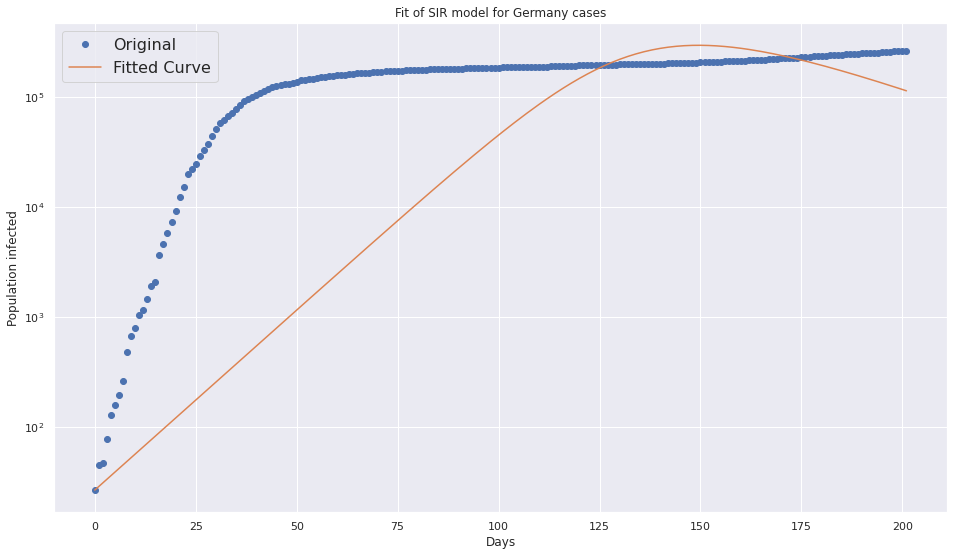

In [13]:
# for country in countries:
#     t,ydata,fitted,res=SIR_model_fit(country,df_analyse)
#     print(res)

country='Germany'
t,ydata,fitted,res=SIR_model_fit(country,df_analyse)
plot_SIR(t,ydata,fitted,country)

# Dynamic beta In SIR

In [20]:
t_initial=28
t_intro_measures=14
t_hold=21
t_relax=21

def Dynamic_beta_In_SIR(country,df):
    
    ydata = np.array(df[country][35:])
    t=np.arange(len(ydata))

    # ensure re-initialization 
    I0=ydata[0]
    S0=N0-I0
    R0=0

    

    beta_max=0.4
    beta_min=0.11
    gamma=0.1
    pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

    SIR=np.array([S0,I0,R0])
    propagation_rates_2=pd.DataFrame(columns={'susceptible':S0,
                                            'infected':I0,
                                            'recoverd':R0})
    
    for each_beta in pd_beta:

        new_delta_vec=SIR_model(SIR,each_beta,gamma)

        SIR=SIR+new_delta_vec

        propagation_rates_2=propagation_rates_2.append({'susceptible':SIR[0],
                                                    'infected':SIR[1],
                                                    'recovered':SIR[2]}, ignore_index=True)
                            
    return propagation_rates_2,ydata


                            

def Dynamic_beta_In_SIR_plot(propagation_rates_2,country):
    fig, ax1 = plt.subplots(1, 1)

    ax1.plot(propagation_rates_2.index,propagation_rates_2.infected,label='infected',linewidth=3)

    t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
    # ax1.bar(np.arange(len(propagation_rates.infected)),ydata, width=0.8,label=' current infected Germany',color='r')
    ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected',color='r')
    ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
    ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
    ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
    ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
    ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

    ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
    ax1.set_yscale('log')
    ax1.set_title('Szenario SIR simulations for:{}'.format(country),size=16)
    ax1.set_xlabel('time in days',size=16)
    ax1.legend(loc='best',
               prop={'size': 16});

### Visualise Dynamic beta In SIR
#### Visualisation only for one Country -- Germany
Note: Make changes in the loop below of change the name of the country to visualise them

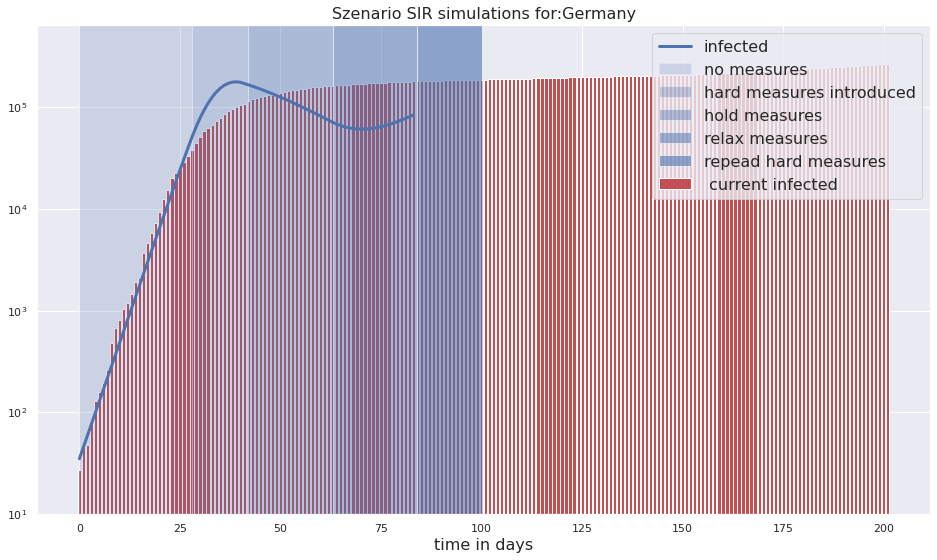

In [21]:
# for country in countries:
#     propagation_rates_2,ydata=third_phase(country,df_analyse)
#     third_plot(propagation_rates_2,country)
#     print(propagation_rates_2)

country='Germany'
propagation_rates_2,_=Dynamic_beta_In_SIR(country,df_analyse)
Dynamic_beta_In_SIR_plot(propagation_rates_2,country)


In [ ]:
# %load src/visualization/visualize.py
import pandas as pd
import numpy as np

import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State

import plotly.graph_objects as go

import os
#print(os.getcwd())
#df_input_large=pd.read_csv('data/processed/COVID_final_set.csv',sep=';')

fig = go.Figure()


t_initial=28
t_intro_measures=14
t_hold=21
t_relax=21

app = dash.Dash()
app.layout = html.Div([

    dcc.Markdown('''
    #  Applied Data Science on COVID-19 data

    Goal of the project is SIR analysis in 3 phases and understanding them.

    '''),

    dcc.Markdown('''
    ## SIR Analysis in 3 phases:
    ### 1st Phase: 
    This is the initial SIR analysis of Germany,where we have initialised the initial susceptibel population (N0) = 1000000, beta(infected rate)=0.4 and gamma(recovery rate)=0.1
    
    ### 2nd Phase: Optimize beta and gamma with curve fitting
    
    ### 3rd Phase: Dynamic beta In SIR(Infection rate)
    '''),
    dcc.Dropdown(
        id='country_drop_down',
        options=[{'label': each,'value':each} for each in countries],
        value=['Germany'], # which are pre-selected
        multi=True
    ),
    dcc.Dropdown(
        id='choose methods',
        options=[ {'label': each,'value':each} for each in ['Phase1','Phase2','Phase3']],
        value='Phase1' # which are pre-selected
        ),
    dcc.Graph(figure=fig, id='main_window_slope'),
    html.Div(id='my-output'),
])



@app.callback(
    [Output('main_window_slope', 'figure'),Output('my-output', 'children')],
    [Input('choose methods', 'value'),Input('country_drop_down', 'value')
    ])
def update_figure(tab_list,country_list):
    traces = []
    results=[]
    if 'Phase1' in tab_list:
#         print(country_list)
        for each in country_list:
#             print(each)
            propagation_rates=run_initialSIR(each,df_analyse)
            traces.append(dict(x=propagation_rates.index,
                                        y=propagation_rates.infected,
                                        mode='markers+lines',
                                        opacity=0.9,
                                        name="Infected for {}".format(each)
                                        ))

            traces.append(dict(x=propagation_rates.index,
                                        y=propagation_rates.recovered,
                                        mode='markers+lines',
                                        opacity=0.9,
                                           name="Recovered for {}".format(each)
                                        )),
            traces.append(dict(x=propagation_rates.index,
                                        y=propagation_rates.susceptible,
                                        mode='markers+lines',
                                        opacity=0.9,
                               name="Susceptible for {}".format(each)
                                        ))
        layout=dict (
                width=1280,
                height=720,
                xaxis={'title':'time in days',
                        'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },
                yaxis={'title':'change'},
                title={'text':'Phase 1 Analysis!'},
        )
    elif 'Phase2' in tab_list:
        for each in country_list:
            results.append(each)
            t,ydata,fitted,res=SIR_model_fit(each,df_analyse)
            results.append(res)
            traces.append(dict(x=t,y=ydata,mode='markers',opcaity=0.9,name="Actual_Infections for {}".format(each)))
            traces.append(dict(x=t,y=fitted,mode='lines',opcaity=0.9,name="Predicted by modelfor {}".format(each)))
        layout=dict (
            width=1280,
            height=720,
            xaxis={'title':'Days',
                'tickangle':-45,
                'tickfont':dict(size=14,color="#7f7f7f"),
              },
            yaxis={'title':'Population Infected','type':'log'},
            title={'text':'Phase 2 Analysis!'}
        )
        
    elif 'Phase3' in tab_list:
        for each in country_list:
            results.append(each)
            propagation_rates_2,ydata=Dynamic_beta_In_SIR(each,df_analyse)
            traces.append(dict(x=propagation_rates_2.index,y=propagation_rates_2.infected,mode='line',opcaity=0.9,
                           name="infected for {}".format(each)))
            t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
            traces.append(dict(x=np.arange(len(ydata)),y=ydata,type='bar',opcaity=0.9,name="currently infected for {}".format(each)))

        layout=dict (
                width=1280,
                height=720,
                xaxis={'title':'Days',
                        'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },
                yaxis={'title':'Infected','type':'log'},
#                 type='line',xref='x',yref='y', x0=10,x1=28,y0=27,y1=236122,
#                            opcaity=0.9,fillcolor="LightSkyBlue",line_width=0.6,name='no measures'
            
        )

    return [{
            'data': traces,
            'layout':layout}, 
        "Results of graphs {}".format(results)]


# @app.callback(
#     Output('my-output', 'children'),
#     [Input('choose methods', 'value')
#     ])
# def update_output_div(input_value):
#     if 'Phase2' in input_value:
#         for each in country_list:
#             t,ydata,fitted,start_infect=SIR_model_fit(each,df_analyse)
#     return "Start_Infect: {}".format(start_infect)

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 373-141-182
Debugger PIN: 373-141-182
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
[28 42 63 84]
[28 42 63 84]


<ipython-input-12-ed3eb3888a1c>:16: RuntimeWarning:

overflow encountered in double_scalars

<ipython-input-12-ed3eb3888a1c>:17: RuntimeWarning:

overflow encountered in double_scalars

/home/resha/anaconda3/envs/Datascince/lib/python3.8/site-packages/scipy/integrate/odepack.py:247: ODEintWarning:

Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.

<ipython-input-12-ed3eb3888a1c>:17: RuntimeWarning:

invalid value encountered in double_scalars



standard deviation errors :  [0.00211418 0.00189541] start infect: 27
Optimal parameters: beta = 0.11384153731813887  and gamma =  0.038529455003755014
Optimal parameters: beta = 0.11384153731813887  and gamma =  0.038529455003755014
Basic Reproduction Number R0  2.9546625382332574
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki
standard deviation errors :  [inf inf] start infect: 0
Optimal parameters: beta = 1.0  and gamma =  1.0
Optimal parameters: beta = 1.0  and gamma =  1.0
Basic Reproduction Number R0  1.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


/home/resha/anaconda3/envs/Datascince/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning:

Covariance of the parameters could not be estimated



[28 42 63 84]
[28 42 63 84]
